
Arthur Poliselli Farsky
arthurpf1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')

    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')

    plt.tight_layout()

Introdução:
Por meio deste arquivo tentarei estabelecer relações entre o índice de desenvolvimento humano, a energia produzida por habitante e a emissão de co2 por habitante. tais informações foram majoritariamente retiradas do "https://www.gapminder.org/tools/#statestatetime$value=2007;;&chart-type=bubbles". Desta forma respondendo à pergunta: Como a quantidade de energia produzida é relacionada com o IDH e como essa energia é relacionada com a emissão de co2.

In [2]:
dadosidh=pd.read_excel('hdi_human_development_index.xlsx')
dadosco2=pd.read_excel('co2_emissions_tonnes_per_person.xlsx')
dadosener=pd.read_excel('energy_use_per_person.xlsx')
idh_idx = dadosidh.set_index('geo')
idh_idx=idh_idx.loc[:, [2007]]
co2_idx=dadosco2.set_index('geo')
co2_idx=co2_idx.loc[:, [2007]]
ener_idx=dadosener.set_index('geo')
ener_idx=ener_idx.loc[:, [2007]]
dados= co2_idx.join(ener_idx, how='inner', lsuffix='_co2', rsuffix='_ener')
dados=dados.join(idh_idx, how="inner")
dados.columns=['co2_2007','ener_2007','idh_2007']
dados["co2_2007_log"]=np.log(dados["co2_2007"])
dados["ener_2007_log"]=np.log(dados["ener_2007"])

In [3]:
writer=pd.ExcelWriter("projeto1.xlsx")
dados.to_excel(writer,"data")
writer.save()

Para facilitar o entendimento dos gráficos serão adotados:
energia/pessoa=equivalente de kg de petróleo por pessoa e
co2/pessoa= tonelada de co2 por pessoa


Ajuste linear entre X3 e X4:
Coeficiente linear: 0.20778670604814042
Coeficiente angular: 0.0022522699099369993


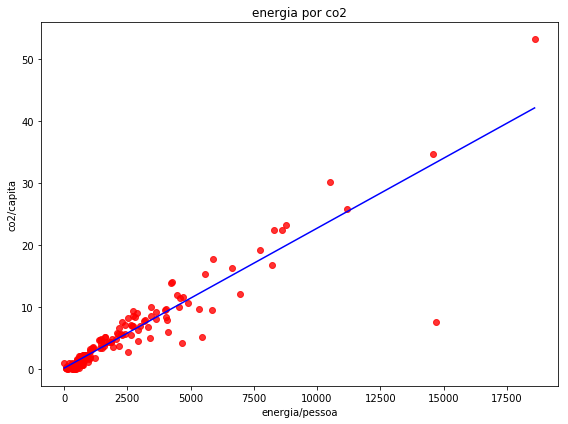

In [4]:
reta(dados['ener_2007'],dados['co2_2007'])
plt.xlabel("energia/pessoa")
plt.ylabel("co2/capita")
plt.title("energia por co2")
plt.show()

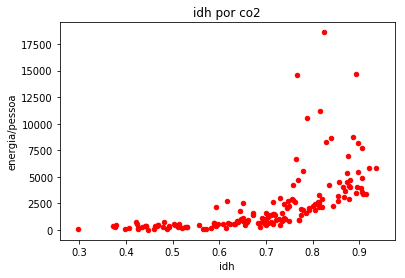

In [5]:
dados.plot.scatter(x='idh_2007',y='ener_2007' , c='red')
plt.ylabel('energia/pessoa')
plt.title("idh por co2")
plt.xlabel('idh')
plt.show()

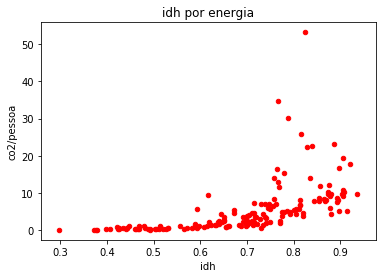

In [6]:
dados.plot.scatter(x='idh_2007',y='co2_2007' , c='red')
plt.ylabel('co2/pessoa')
plt.title("idh por energia")
plt.xlabel('idh')
plt.show()

colocando a energia/co2 em escala logaritimica temos:

Ajuste linear entre X3 e X4:
Coeficiente linear: 2.2560735804173833
Coeficiente angular: 6.968082608006659


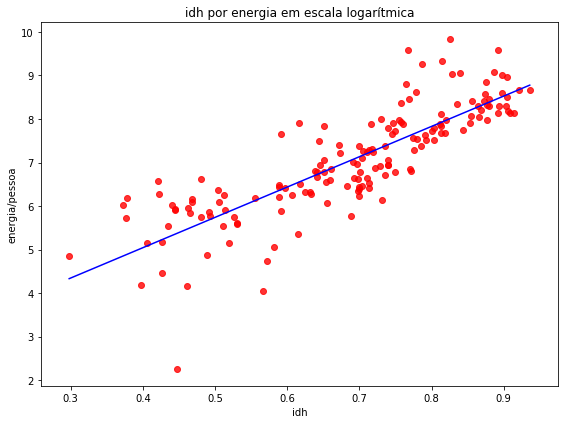

In [10]:
reta(dados['idh_2007'],dados['ener_2007_log'])
plt.ylabel("energia/pessoa")
plt.title("idh por energia em escala logarítmica")
plt.xlabel("idh")
#plt.yscale(False)
plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: -5.085194161771713
Coeficiente angular: 8.625902845692385


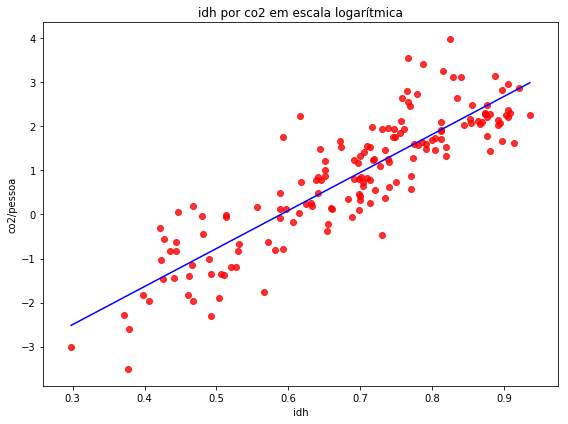

In [8]:
reta(dados['idh_2007'],dados['co2_2007_log'])
plt.ylabel("co2/pessoa")
plt.title("idh por co2 em escala logarítmica")
plt.xlabel("idh")
plt.show()

Analise dos resultados:
Observando os gráficos podemos perceber uma correlação linear entre a emissão de co2 e a quantidade de energia consumida. Esta tendência apresenta uma correlação que se aproxima de 1. Tanto o gráfico de idh por co2 por pessoa como o de idh por energia por pessoa apresenta uma linha de tendência exponencial, assim quando nos colocamos o eixo de co2/energia a linha de tendência se torna linear e de correlação que rodeia os 0,85.

"Na maioria dos países, nos quais o consumo de energia comercial per capita está abaixo de 1000kg equivalente de petróleo por ano, as taxas de analfabetismo, mortalidade infantil e fertilidade total são altas, enquanto a expectativa de vida é baixa. Ultrapassar a barreira 1000 kg/capita parece ser, portanto, essencial para o desenvolvimento. À medida em que o consumo de energia comercial per capita aumenta para valores acima de 2000 kg/pessoa (ou mais), como é o caso dos países desenvolvidos, as condições sociais melhoram consideravelmente. O consumo médio per capita nos países industrializados da União Européia é de 3220 kg/capita; a média mundial é de 1660 kg/capita."

adaptado de:
http://www.scielo.br/scielo.php?script=sci_arttext&pid=S0103-40141998000200002

Conclusões:
Pode se concluir que a correlação existente entre energia produzida e a emissão de co2 é dada já que grande parte da energia produzida é de fontes que tem como subproduto o co2.(http://www.mme.gov.br/documents/10584/3580498/14+-+Energia+no+Mundo+-+Matrizes+e+Indicadores+2017+-+anos+ref.+2015+-+16+%28PDF%29/60755215-705a-4e76-94ee-b27def639806;jsessionid=23A29A5505323A1DD0ED0E7D02E956E2.srv155). Apesar desta correlação se aproximar de 1, existem outliers que são países que tem grande parte de sua matriz energética que não produzem co2, como a Islândia que a sua fonte primaria de energia é a geotérmica. Com a relação observada nos gráficos entre o idh e a energia percebesse que os países com maior idh tem a tendência de utilizar mais energia, assim também é confirmado por diversos artigos, como o citado acima. É uma teoria que os produtos e serviços que aumentam o idh utilizam razoável quantidade de energia, assim quanto mais serviços e produtos para aumentar o idh, maior a quantidade de energia consumida. Por último, o gráfico do idh e do co2 também respeita a mesma correlação entre o do idh e da energia já que o co2 acaba sendo uma consequência da geração de energia.